# DSC 207R FINAL PROJECT
## Fall 2022
## Kevin Pham
### Due Date:  December 6th, 2022

The final project is a guided project for you to build your own end-to-end analysis using Python, especially using what you learned on Python _numpy_, _pandas_, _matplotlib_/_seaborn_ and _scilitlearn_ libraries. 

This project is culmination of all you’ve learned in this course! You should expect to spend <b>24-32 total hours</b> on the project. Be sure to read all of the items below before starting. Make sure to follow Slack for any updates on the final project.

# <b>Deliverables</b>: 
The final project has 2 submissions - a report(this notebook) and an presentation video(self recorded). You will be evaluated on both the components.

## 1. Report (this notebook)
Submit the notebook via Gradescope by midnight on the due date above along with clear instructions on how to download the datasets you used for and reproduce your results. You can host the dataset(on github) such that it can be used as a url directly. Don't forget to add your name on top as the author of the notebook. 



There are a number of steps outlined below, but is critical that you do not view this as an entirely linear process.  Remember that the science component in data science is the creation of a hypothesis based on exploration and testing of that hypothesis through analysis.  You may need to go through many of these steps multiple times before you arrive at meaningful hypothesis or conclusions.

### Step 1: Find a dataset or datasets

1.1. **Based on your interest, identify a dataset which you will want to examine.**  You will find a starting point for where you can find open datasets at the end of this notebook, but feel free to use other datasets you have access to and can publicly share results about. 
 

This step may take some time, as you’ll likely look at a number of datasets before you find one (or more) which holds promising data for the kinds of questions you want to ask. 

Below are some resources but you are not limited to them -

UCI's Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets.php <br>
Kaggle: https://www.kaggle.com/datasets <br>
KDnuggets Dataset: http://www.kdnuggets.com/datasets/index.html <br>
government data (http://www.kdnuggets.com/datasets/government-local-public.html) <br>
Data APIs (http://www.kdnuggets.com/datasets/api-hub-marketplace-platform.html <br>
Data Mining Competitions (http://www.kdnuggets.com/competitions/index.html <br>
US Government Data: https://www.data.gov/ <br>
UK Government Data: https://data.gov.uk/ <br>
Canada's Open Data Exchange: https://codx.ca/ <br>
World Health Organization: http://www.who.int/gho/en <br>
World Bank: http://data.worldbank.org/ <br>

Remember! Finding a dataset of interest and exploring it is most of your job for your final project. So expect this to take some time - and that's both perfectly normal and completely okay. Get started early and make sure to check if the dataset you find satisfies the project requirements.
<br>

<br>

1.2. **Once selected, explain the choice of dataset and why you want to work with it.**

#EXPLAIN AND INGEST YOUR DATASET IN THIS SECTION

For this project, I have decided to use the Wine Quality dataset from the UCI Machine Learning Repository. I am interested in learning more about wines and getting a better sense to distinguish between good and bad wines. This dataset is intriguing to me because it offers so many different aspects of wines that I hadn't considered before and would offer me insight on being able to determine what aspects lead a wine to have a higher quality. Given the format of this dataset, the data is very suitable for classification and linear regression.

I found this dataset at the following link: https://archive.ics.uci.edu/ml/datasets/wine+quality.
For quicker access, I have hosted the datasets on github along with the relevant description text as another file at the following link: https://github.com/kevinp227/DSC-207R-Python-for-Data-Science.
You can download the dataset through the offical UCI Machine Learning Repository link or through the github link to view or follow along.

### Step 2: Explore the datasets

In this step, you should explore what is present in the data and how the data is organized. You’ll need to determine what common features allow you to merge the datasets.  

You are expected to answer the following questions using the _pandas_ library and markdown cells to describe your actions:

* Are there quality issues in the dataset (noisy, missing data, etc.)? 
* What will you need to do to clean and/or transform the raw data for analysis?

You can also visually explore the datasets and explain your findings, specifically,

* How are the data distributed? 
* What are some common trends?
* What are the relationships between variables in your datasets?

Now that we have our dataset, we first want to import our libraries and read in our data. From looking at the data prior, the data has not properly been formatted and so our first course of action when reading in the data is to split the data into separate columns for each field by the ';' delimiter. 

In [1]:
#PERFORM AND EXPLAIN YOUR EXPLORATORY ANALYSIS IN THIS SECTION

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

Since we were given two separate csvs for two types of wine, we want to combine the two into one to work on throughout the rest of the project. We are going to add in another column that will label whether that wine is red wine or white wine.

In [2]:
# new column for type of wine
red['type of wine'] = 'red'
white['type of wine'] = 'white'

After we have our new column, we are going to concatenate the two dataframes together to make one dataframe. This will make it easier to do future calculations with all our data in one place. We will use head() to take a quick look at our data and make sure our output is as intended.

In [3]:
wine_df = pd.concat([red, white])
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type of wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Next we are going to comb through the dataset to find null values, or missing data, that may affect our data and distributions along with any future calculations.

In [4]:
# check for null values in each column
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type of wine            0
dtype: int64

The results show that there are no null or missing values that we need to worry about removing or addressing. The next step is to look at the descriptive statistics of our data for each column with integer values to see basic information about the distribution, central tendency, and variability for that field along with identifying the number of wines by type. One thing to note here is that there is significantly more white wine data than red wine data which will skew our data.

In [5]:
# describe column
# exclude type of wine as it is a label
wine_df.iloc[:,:-1].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
# find the number of white and red entries
wine_df['type of wine'].value_counts()

white    4898
red      1599
Name: type of wine, dtype: int64

We also want to get info on each of the field types so that we know what kind of dtypes we will be working with.

In [7]:
# get info
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type of wine          6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [8]:
# get shape
wine_df.shape

(6497, 13)

From our inspection of the data, we see that the dataset contains information on wine attributes that affect its quality. From the shape of the dataset, we see that there are 6407 row entries representing the red and white variants of the Portuguese "Vinho Verde" wine, 10 columns representing the wine attributes, 1 column for the wine quality, and 1 column for if it is red or white white. The dataset consists entirely of numerical data except for the column representing the wine type which is categorical string data. This data gives us vital information for variants of wine so that wine critics or any other viewer can use to compare the different wine variants or to explore the relationship and effect between the fields. 

After inspecting the descriptive statistics and the data types, we saw that there was no issue with the values and no blatant issues. Next, we also want to visualize the data distribution in its raw form. We use histograms to view the data density and observe potential outliers. 

[Text(0.5, 1.0, 'citric acid')]

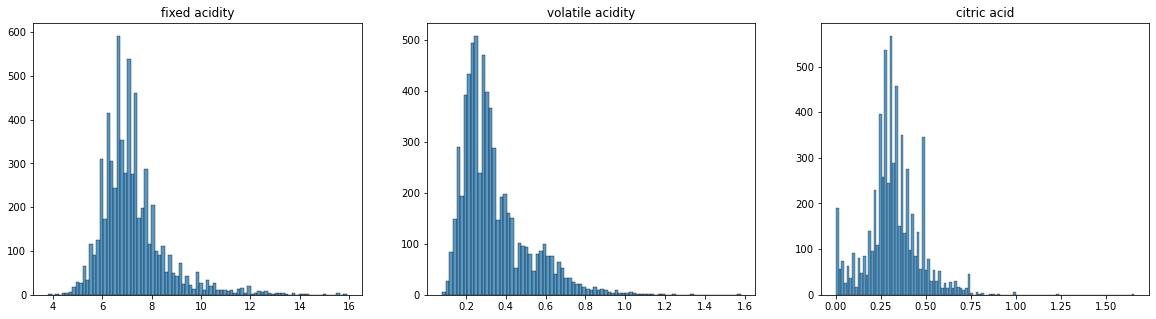

In [9]:
# Plot graphs
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(data=wine_df['fixed acidity'], ax=axes[0])
axes[0].set(xlabel='', ylabel= '')
axes[0].set(title = "fixed acidity")
sns.histplot(data=wine_df['volatile acidity'], ax=axes[1])
axes[1].set(xlabel='', ylabel= '')
axes[1].set(title = "volatile acidity")
sns.histplot(data=wine_df['citric acid'], ax=axes[2])
axes[2].set(xlabel='', ylabel= '')
axes[2].set(title = "citric acid")

From the three graphs above, we see that there are outliers among all three graphs that cause our data to be skewed to the right. For analyses involving these three fields, it may be helpful to remove these outliers or stay aware that our data is skewed.

[Text(0.5, 1.0, 'free sulfur dioxide')]

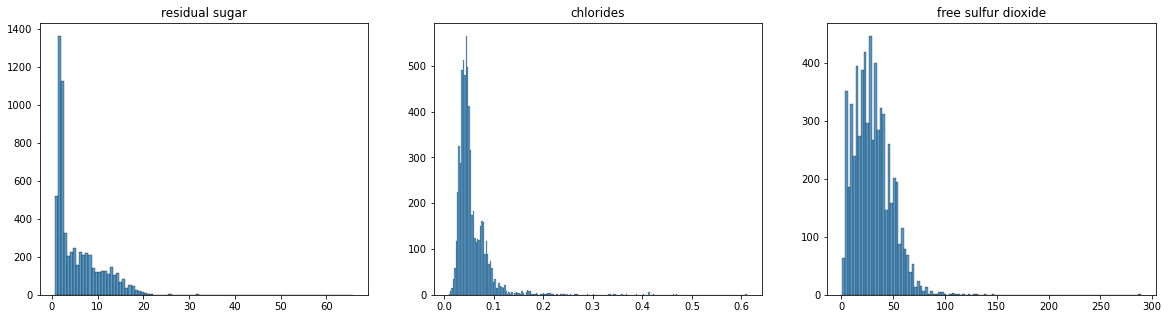

In [10]:
# Plot graphs
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(data=wine_df['residual sugar'], ax=axes[0])
axes[0].set(xlabel='', ylabel= '')
axes[0].set(title = "residual sugar")
sns.histplot(data=wine_df['chlorides'], ax=axes[1])
axes[1].set(xlabel='', ylabel= '')
axes[1].set(title = "chlorides")
sns.histplot(data=wine_df['free sulfur dioxide'], ax=axes[2])
axes[2].set(xlabel='', ylabel= '')
axes[2].set(title = "free sulfur dioxide")

From the three graphs above, we see that there are outliers among the second and third graphs that cause our data to be skewed to the right. For analyses involving these two fields, it may be helpful to remove these outliers or stay aware that our data is skewed.

[Text(0.5, 1.0, 'pH')]

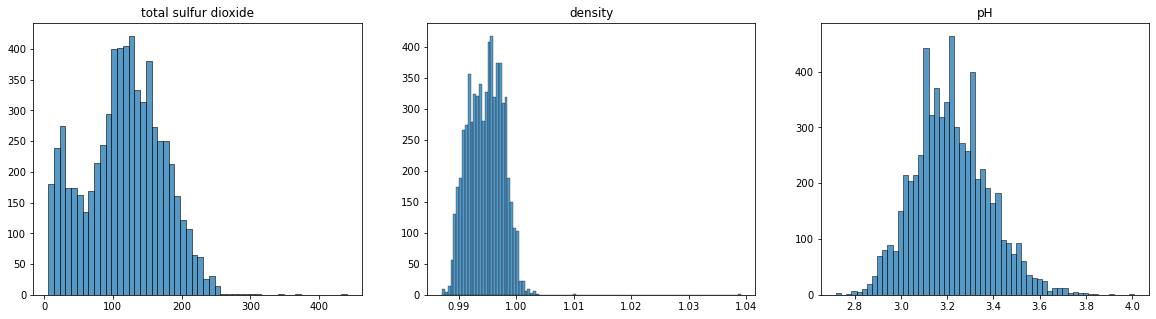

In [11]:
# Plot graphs
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(data=wine_df['total sulfur dioxide'], ax=axes[0])
axes[0].set(xlabel='', ylabel= '')
axes[0].set(title = "total sulfur dioxide")
sns.histplot(data=wine_df['density'], ax=axes[1])
axes[1].set(xlabel='', ylabel= '')
axes[1].set(title = "density")
sns.histplot(data=wine_df['pH'], ax=axes[2])
axes[2].set(xlabel='', ylabel= '')
axes[2].set(title = "pH")

From the three graphs above, we see that there are outliers among the first and second graphs that cause our data to be skewed to the right. For analyses involving these two fields, it may be helpful to remove these outliers or stay aware that our data is skewed.

[Text(0.5, 1.0, 'quality')]

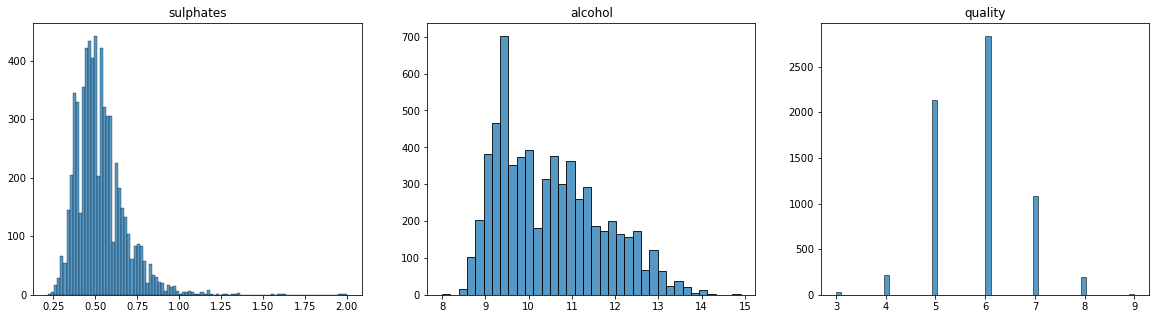

In [12]:
# Plot graphs
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(data=wine_df['sulphates'], ax=axes[0])
axes[0].set(xlabel='', ylabel= '')
axes[0].set(title = "sulphates")
sns.histplot(data=wine_df['alcohol'], ax=axes[1])
axes[1].set(xlabel='', ylabel= '')
axes[1].set(title = "alcohol")
sns.histplot(data=wine_df['quality'], ax=axes[2])
axes[2].set(xlabel='', ylabel= '')
axes[2].set(title = "quality")

From the three graphs above, we see that there are outliers in the first graph that cause our data to be skewed to the right. For analyses involving the sulphates field, it may be helpful to remove these outliers or stay aware that our data is skewed.

From these histograms, we are able to see the various distributions, with many of the distributions containing outliers. However, we do not want to remove the whole rows for each outliers because each row contains data on the variants of the wine classified and removing the whole entry would cause us to lose vital information for that wine, given that we already do not have a large amount of sample data. As such, for calculations involving the fields with outliers, we need to be aware that the data is skewed.

### Step 3:  Identify 3 research questions and perform analysis

Now that you have a better understanding of the data, you will want to form a research question which is interesting to you. The research question should be broad enough to be of interest to a reader but narrow enough that the question can be answered with the data.  Some examples:

* __Too Narrow:__  What is the GDP of the U.S. for 2011?  This is just asking for a fact or a single data point.  

* __Too Broad:__  What is the primary reason for global poverty?  This could be a Ph.D. thesis and would still be way too broad.  What data will you use to answer this question?  Even if a single dataset offered an answer, would it be defendable given the variety of datasets out there?

* __Good:__  Can you use simple sentiment analysis on comments about movies in a movie database to predict its box office earnings?  If you have, or can obtain, data on a variety of movies and you have their box office earnings, this is a question which you can potentially answer well. 

__Remember__, this course is for learning Python. You will not be graded on the complexity, accuracy or performance of your analytical methods. However, you are expected to use a Python library, e.g., _scikitlearn_, successfully to generate results and explain why you picked the methods you used.

Some points to note :
1. Make sure that the 3 questions are distinct in terms of the kind of insight provided. For eg. avoid having 3 questions for correlation that only differ by the fields used.
2. You can reach out to the professor or TA to seek feedback on your questions.



#OVERVIEW YOUR QUESTION AND PERFORM YOUR ANALYSIS IN THIS SECTION

How does the relationship between the different wine attributes and the quality of wine vary by the type of wine?

Using Random Forest, can we determine what wine attribute had the greatest significance in classifying the type of wine?

Can we use Linear Regression to predict the alcohol value in the wine?

### Question 1

Here, we will explore the relationship between the different wine attributes and the quality of wine by wine type. To do so, we need to find the correlation between them and use a correlation heatmap for a easy-to-read visualization that will depict the correlations between the variables and the strength of their relation.

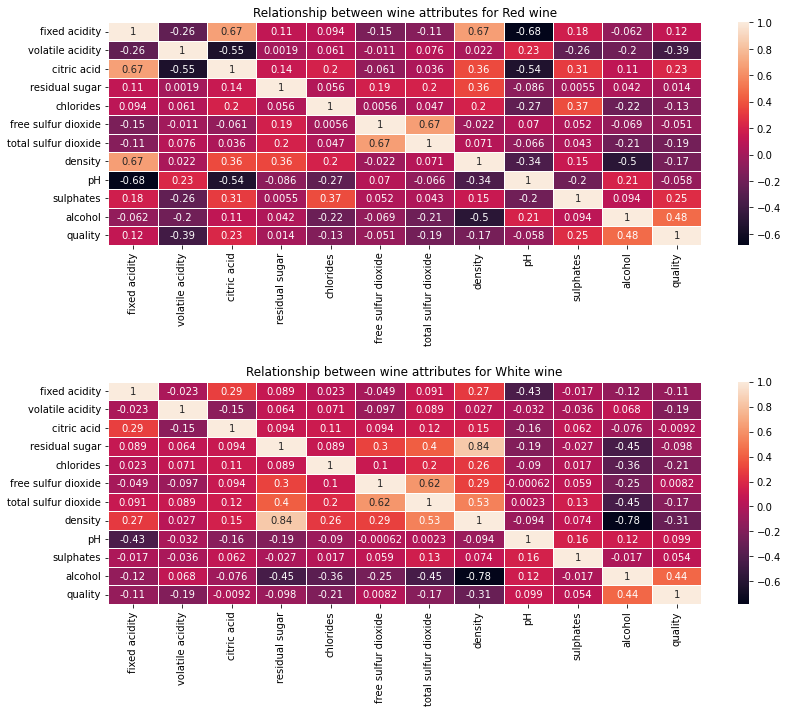

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

sns.heatmap(red.corr(),annot=True,linewidths=0.5, ax=axes[0])
axes[0].set(xlabel='', ylabel= '')
axes[0].set(title = "Relationship between wine attributes for Red wine")
sns.heatmap(white.corr(),annot=True,linewidths=0.5, ax=axes[1])
axes[1].set(xlabel='', ylabel= '')
axes[1].set(title = "Relationship between wine attributes for White wine")
fig.tight_layout(h_pad=2, w_pad= 5)

### Question 2

First we import the necessary libraries to perform Random Forest.

In [14]:
# import libraries
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In order to perform Random Forest, we need all our values to be numerical and so we use label encoder to transform the categorical variables into numerical datatypes. 

In [15]:
wine_df_LE = wine_df.copy(deep=True)
label = LabelEncoder()
label.fit(wine_df_LE['type of wine'].drop_duplicates())
wine_df_LE['type of wine'] = label.transform(wine_df_LE['type of wine'])
wine_df_LE.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type of wine              int32
dtype: object

We then separate our data into x and y and then split the data into training and testing.

In [16]:
X = wine_df_LE[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]
y = wine_df_LE['type of wine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Next we will create our classifier and fit it onto our training data.

In [17]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Then we set up our predictions and calculate our accuracy score.

In [18]:
predictions = clf.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.9953846153846154

Lastly, we utilize a bar graph in order to visualize which feature had the largest importance in classifying the wine type. This bar chart lets us easily interpret the results and identify our key metric.

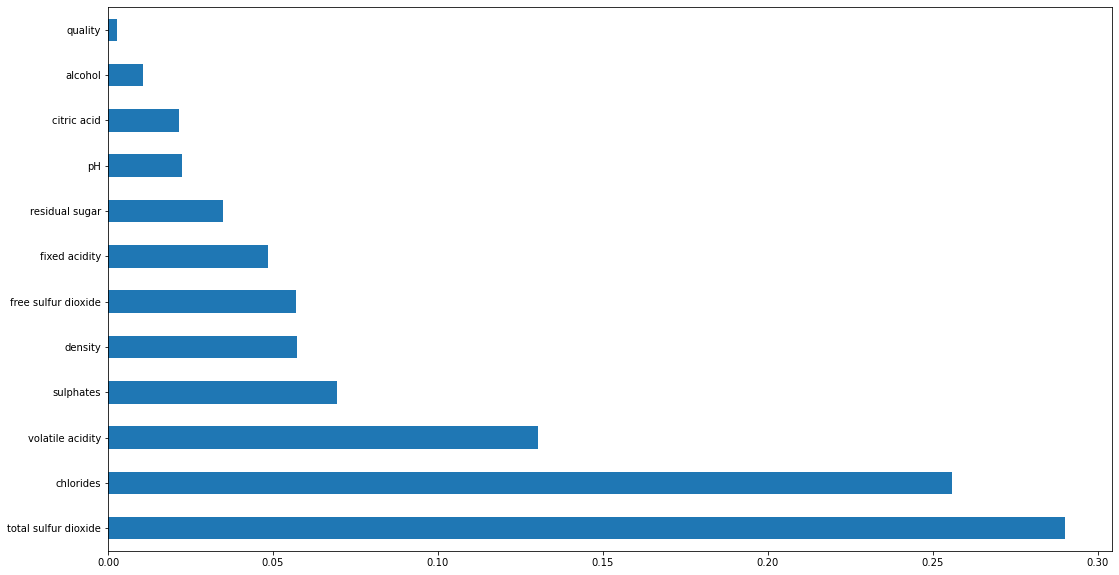

In [19]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh', figsize=(18,10));

### Question 3

We first import the libraries necessary to perform linear regression.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Using the previously defined label encoded data, we separate our data into x and y and then split the data into training and testing.

In [21]:
X = wine_df_LE[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'quality', 'type of wine']]
y = wine_df_LE['alcohol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Next we fit the Linear Regression model onto our training data and produce the coeffecients for each of the wine attributes.

In [22]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)

for i, name in enumerate(X.columns):
    print(f'{name:>10}: {Lin_reg.coef_[i]}') 
print("Intercept: ", Lin_reg.intercept_)

fixed acidity: 0.5371642409684257
volatile acidity: 0.6457835161948279
citric acid: 0.4791920845669808
residual sugar: 0.22959079683471248
 chlorides: -0.5520413900308676
free sulfur dioxide: -0.0031098840096843716
total sulfur dioxide: 0.00047734859093717663
   density: -681.7020546831262
        pH: 2.6364323729049284
 sulphates: 0.9685943030205677
   quality: 0.07992948668683833
type of wine: -1.2640712666712608
Intercept:  674.6365707357409


After we printed our results, we then calculate the mean squared error and coefficient of determination in order to examine our accuracy.

In [23]:
y_pred_test = Lin_reg.predict(X_test)
print("MSE: ", mean_squared_error(y_pred_test, y_test))
print("R^2 score: ", r2_score(y_pred_test, y_test))

MSE:  0.42724073759631964
R^2 score:  0.697599874674959


Lastly, we generate a scatterplot to see how our predicted values fared against our actual values. This scatterplot allows us to easily visualize and interpret the results in comparing the actual with the predicted values.

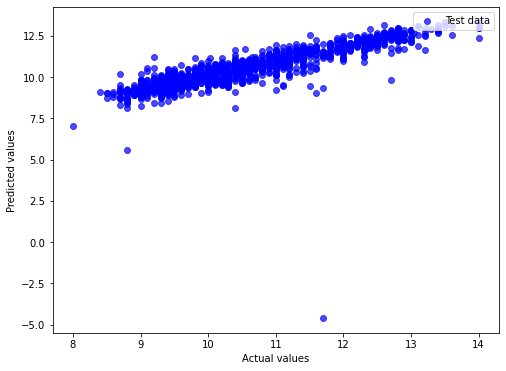

In [24]:
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')

plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc = 'upper right')

### Step 4:  Present your findings

In this step, you can begin to report your findings.  What did you learn from the data and how do your findings help answer your research question?

This includes following all best practices for presenting your findings that you learnt during the mini-project. The report should be easy to read and inmportant points and explanations clearly highlighted.

__Remember:__ Rarely will a single data analysis conclusively answer a research question.  Here, you need to identify possible limitations.  For example, are your results limited to a certain area, city, or country?  Are you making assumptions about the data which may, or may not, be valid (e.g., that students in one term are equally qualified as students in another)?  Document these limitations in a few paragraphs.


#EXPAND THIS SECTION TO PRESENT YOUR FINDINGS

In our first research question, we wanted to explore how the relationship between the wine attributes and the wine quality varied by the type of wine. From our two heatmaps, we were able to see the correlation between the different attributes, both positive and negative, and it was evident that the correlations differed by the type of wine. When comapring the differences in correlation between the quality of the the Red Wine and White Wine, we saw that the red wine had higher correlations in: fixed acidity, citric acid, residual sugar, chlorides, density, sulphates, and alcohol while the white wine had higher correlations in: volatile acidity, free sulfur dixodie, total sulfur dioxide and pH. In regards to quality, the red wine had the highest correlation of 0.48 with alcohol and the lowest correlation of -0.39 with volatile acidity. On the other hand, the white wine had the highest correlation of 0.44 with alcohol and the lowest correlation of -0.31 with density.

In our second research question, we were interested in determining the feature that had the largest significance in our model for classifying the type of wine using a Random Forest algorithm. After training and testing our data, we were able to determine that the accuracy score of 99.5%, demonstrating that our algorithm was very successful in classifying the testing data based on our training data. This high accuracy score further enforced the belief that the algorithm was accurate and that our conclusions on the important feature is also accurate. From our bar graph, we are able to see that the wine attribute "total sulfur dioxide" was the most important feature for classifying our wine type. 

In our third research question, we were interested in exploring whether we can predict the alcohol value for each wine. After training and testing our data, we were able to calculate R<sup>2</sup> score of 0.697. Since R<sup>2</sup> scores range from 0-1 with 0 being that the model cannot make any predictions with accuracy and 1 being our estimator perfectly predicts the value, from our R<sup>2</sup> score of 0.697 it is evident we were successful in being able to predict the alcohol value for wine. While we can predict the alcohol value, there is still a lot of room for improving our model as our R<sup>2</sup> score was not extremely close to 1. When looking at our scatterplot, we see that our predicted values were relatively near the actual values but not exactly, suggesting there is more room for improvement.

There were a number of limitations observed throughout our analyses. While our accuracy score for the second analysis was high, it is not an indication that the results are generalizable. The same can be said for our results from the third analysis with the R<sup>2</sup> score. For better and more generalizable results, we would want to gather more sample data and re-run this analysis so that our data is more representative. 

Similarly, another limitation is the type of wine as this dataset was specifically for red and white variants of the Portuguese "Vinho Verde" wine. Ideally, we would be able to gather data on all types of wines to add more substance and variety to our dataset. Additionally, we see that there are 4898 white wines while only 1599 red wines. As such, for our first analysis revolving around correlation and second analysis revolving around classification, there is a possibility that the correlations and the wine attribute responsible for classifying will change with much more samples given that our data was skewed due to the unevenness of the data.

We also need to re-examine where our data came from and if there were any ethical concerns. One ethical concern was on how the creators of this dataset compiled information on the quality. From the explanation in the wine quality names file, it appears that the creators took the median of at least 3 evaluations made by wine experts to grade the wine quality. This methodology indicates that the results are very subjective and is not representative. If we wanted our results to be more generalizable, we would need far more testers and diversity.  

# 2. Video

Make a video where you go over each part of the report speaking about the steps you undertook and explaining your work, reasonings, insights and highlighting the important points of the project. You do not need to explain the lines of code (unless you feel it is required). 

1. The video should be more than 5 minutes and strictly less than 10 minutes.
2. Both audio and video is required.
3. You can use the zoom to record the video. Start a meeting, start video, start recording and share screen.
4. Make sure your audio is clear before uploading the video to the gradescope.
